In [1]:
import torch
import tensorflow
from tensorflow import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
import torchvision.transforms as T
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.10.0'

In [2]:
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

In [3]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage

In [4]:
import pandas as pd
from PIL import Image
import numpy as np

### Фильтры

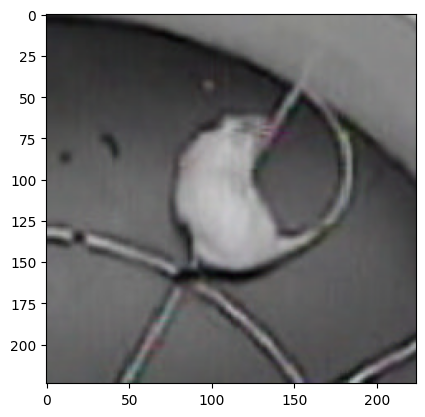

In [94]:
image = PIL.Image.open('001.bmp')
plt.imshow(image)

Гаусс

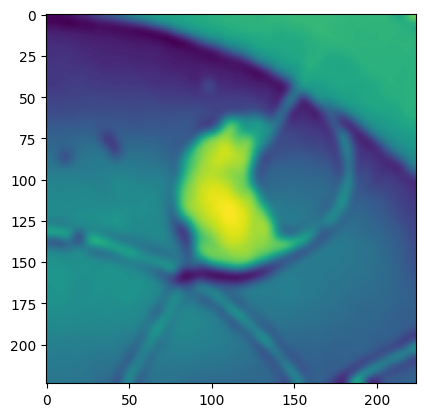

In [95]:
pix = np.array(image)
result = ndimage.gaussian_filter(pix, 3)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
plt.imshow(PIL_image)
plt.show()

('R', 'G', 'B')
('L',)


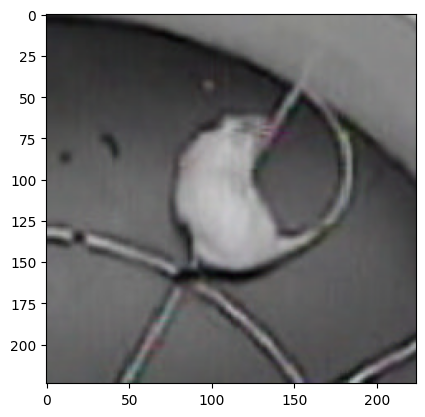

In [97]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])
#pix = cv2.imread("1.dicom.jpeg", 0).astype('float64')

filename = "001.bmp"
with PIL.Image.open(filename) as pix:
    pix.load()
 
plt.imshow(pix)
b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)

# преобразуем в серое
pix = pix.convert("L")
 
b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)

Робертс

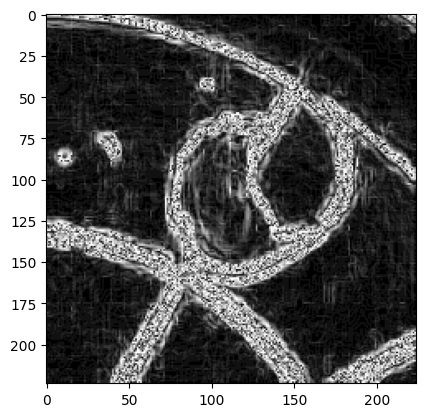

In [98]:
vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

 
PIL_image = PIL.Image.fromarray(np.uint8(edged_img))

plt.imshow(PIL_image,cmap=plt.cm.gray)
# PIL_image.save("roberts_test.bmp")

  

Прюитт

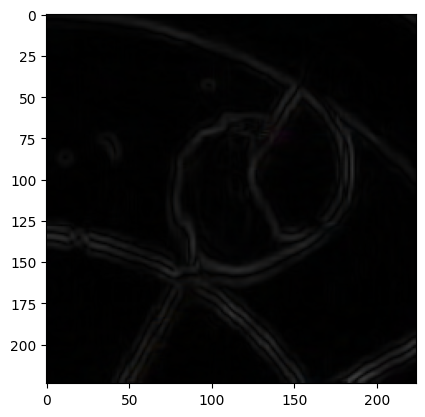

In [99]:
pic = PIL.Image.open("001.bmp")
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

# первоначальное изображение
plt.imshow(result, cmap=plt.cm.gray, aspect='equal')

Собель

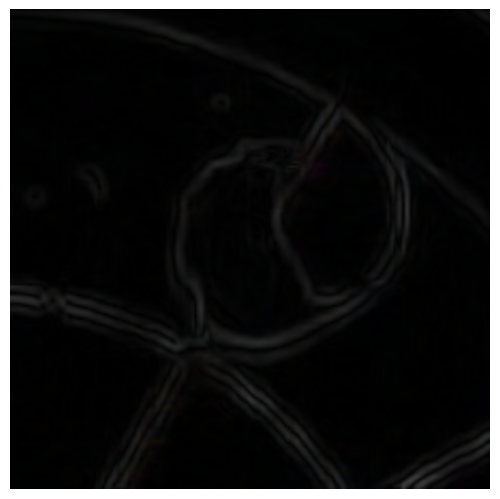

In [100]:
pic = PIL.Image.open("001.bmp")
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.sobel(pix)
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(result, cmap=plt.cm.gray, aspect='equal', interpolation="mitchell")
# plt.savefig("sobel_test.bmp", dpi=300)

Лаплас

In [101]:
def LoG_filter(image, sigma, size=None):
    # ядро LoG
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

image = cv2.imread("001.bmp", cv2.IMREAD_GRAYSCALE)
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

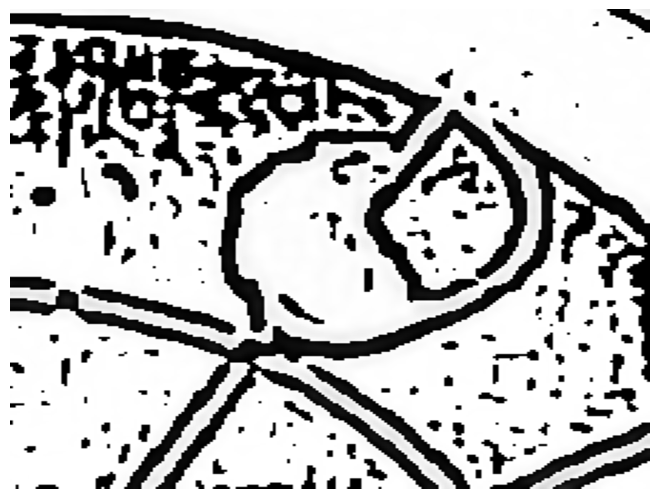

In [102]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(filtered_image, cmap=plt.cm.gray, aspect='auto')

## Выделение областей

### MeanShift

In [61]:
from sklearn.cluster import MeanShift, estimate_bandwidth

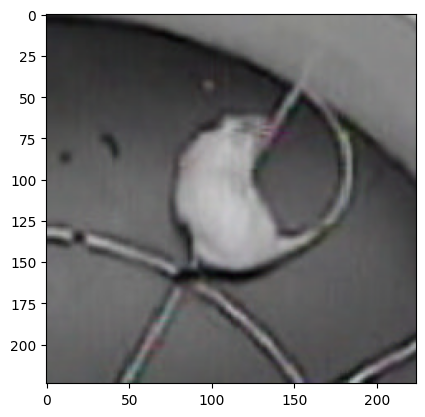

In [103]:
image = PIL.Image.open("001.bmp").convert('RGB')

plt.imshow(image, cmap=plt.cm.gray, aspect='equal')


img = np.array(image)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(image, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

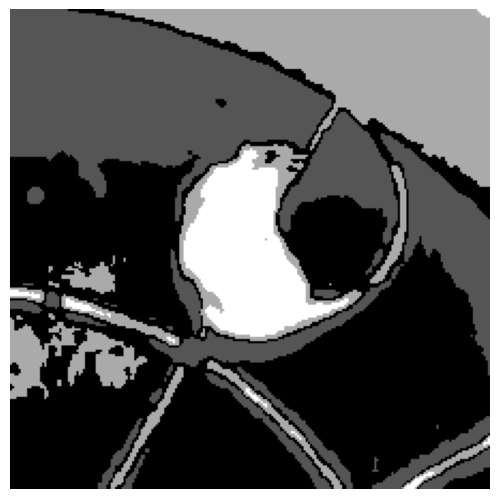

In [104]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result_image, cmap=plt.cm.gray, aspect='equal')
# plt.savefig("meanshift_test.bmp", dpi=300)

### Floodfill

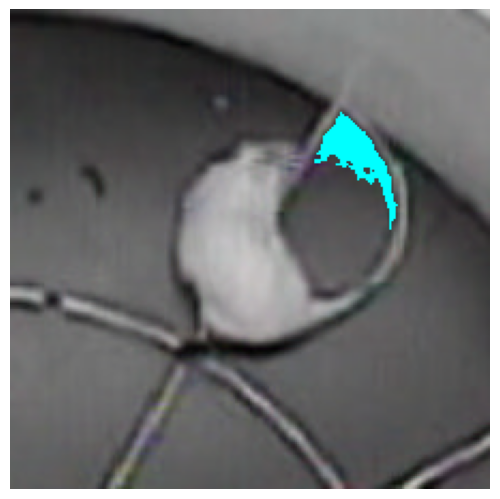

In [105]:
img = cv2.imread('001.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

# нужно задать координаты точек - центров заливки. Без этого работать не будет!

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
# plt.savefig("floodfill_test.bmp", dpi=300)

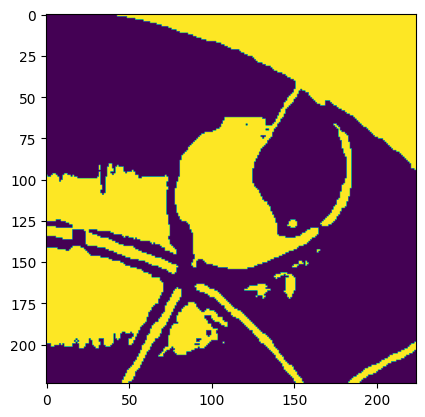

In [108]:
image = cv2.imread("001.bmp")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 100
upper_bound = 100

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
# im.save("threshold_test.bmp")
plt.imshow(im)

## Зашумление и удаление шумов

### Гауссов шум

In [109]:
# здесь представлен пример формирования шума на сером изображении, пример на
# цветном будет ниже

img = cv2.imread('001.bmp')
img_gray = img[:,:,1]
noise = np.random.normal(0, 50, img_gray.shape) 
img_noised = img_gray + noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

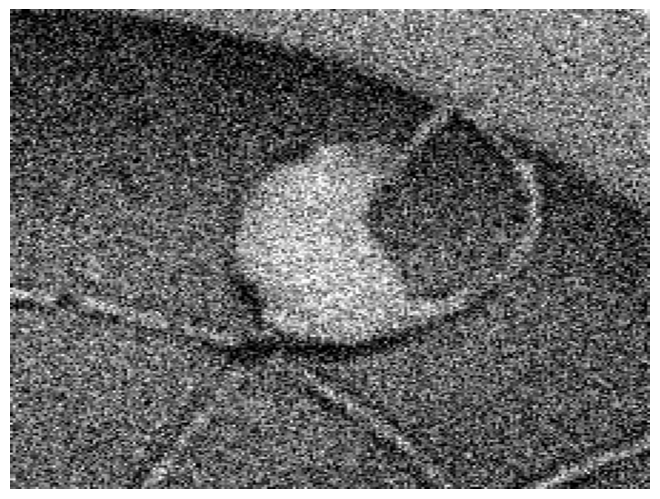

In [111]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("gauss_noise_test.jpg", dpi=300)

### Импульсный шум

In [112]:
x = np.arange(0, 360, 1)
y = np.sin(np.deg2rad(x))

noise_sample = np.random.default_rng().uniform(0.2*min(y), 0.3*max(y), int(0.03*len(y)))
zeros = np.zeros(len(y) - len(noise_sample))
noise = np.concatenate([noise_sample, zeros])
np.random.shuffle(noise)
y_noised = y + noise

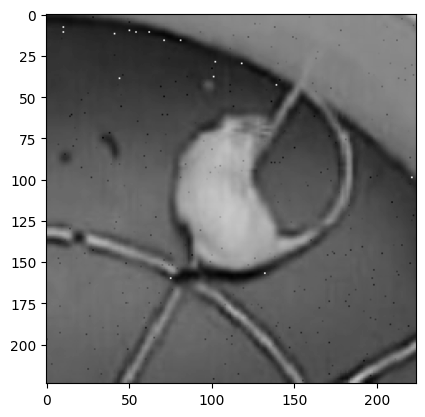

In [113]:
image = cv2.imread("001.bmp")
 
h, w = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

s = 300  # количество точек - шума

noise_sample = np.random.default_rng().uniform(low=200, high=250, size=s)
 
rs1 = np.random.randint(0,gray.size/h-1,s)
rs2 = np.random.randint(0,gray.size/w-1,s)

j = 0

# добавляем шум
for i in noise_sample:
    gray[rs2[j]][rs1[j]] += i
    j += 1
 
plt.imshow(gray, cmap=plt.cm.gray, aspect='equal')

### Шум соли и перца (Salt-and-Pepper)

In [114]:
img_size = img_gray.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
img_noised = img_gray.copy()
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)
img_noised.flat[random_indices] = noise

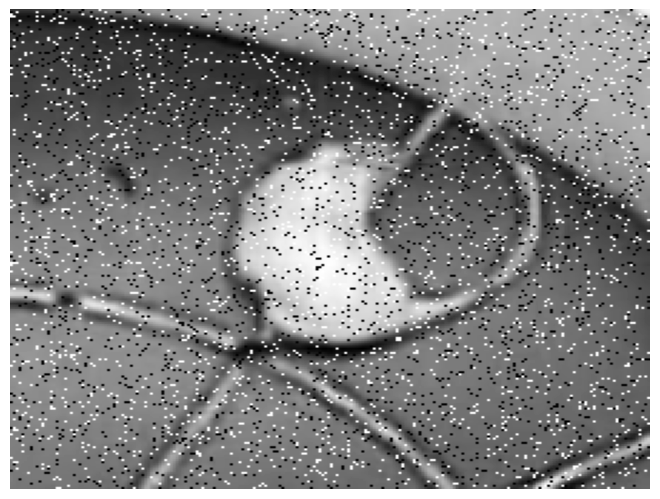

In [116]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("saltnpepper_test.jpg", dpi=300)

### Шум квантования

In [117]:
# Генерация исходного сигнала-примера
x = np.arange(0, 100, 2)
y = 0.3 * x + 0.6

# Генерация шума
y_size = len(y)
noise_percentage = 0.2
noise_size = int(noise_percentage * y_size)
random_indices = np.random.choice(y_size, noise_size)
y_noised = y.copy()
y_noised[random_indices] = np.rint(y_noised[random_indices])

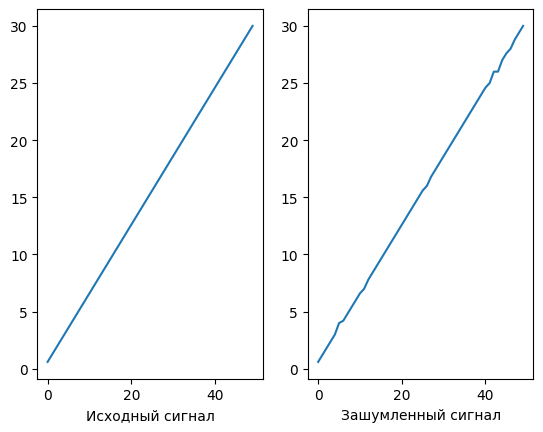

In [118]:
plt.subplot(121)
plt.plot(y)
plt.xlabel("Исходный сигнал")
plt.subplot(122)
plt.plot(y_noised)
plt.xlabel("Зашумленный сигнал")
plt.show()

### Удаление шума из изображения и видео

In [120]:
img = cv2.imread('gauss_noise_test.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 25)

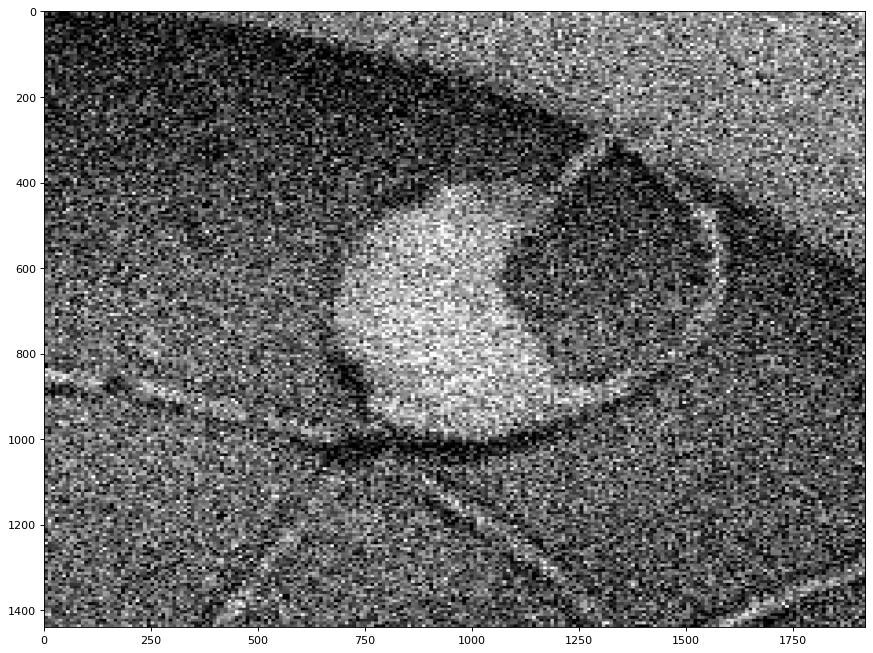

In [121]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(img)

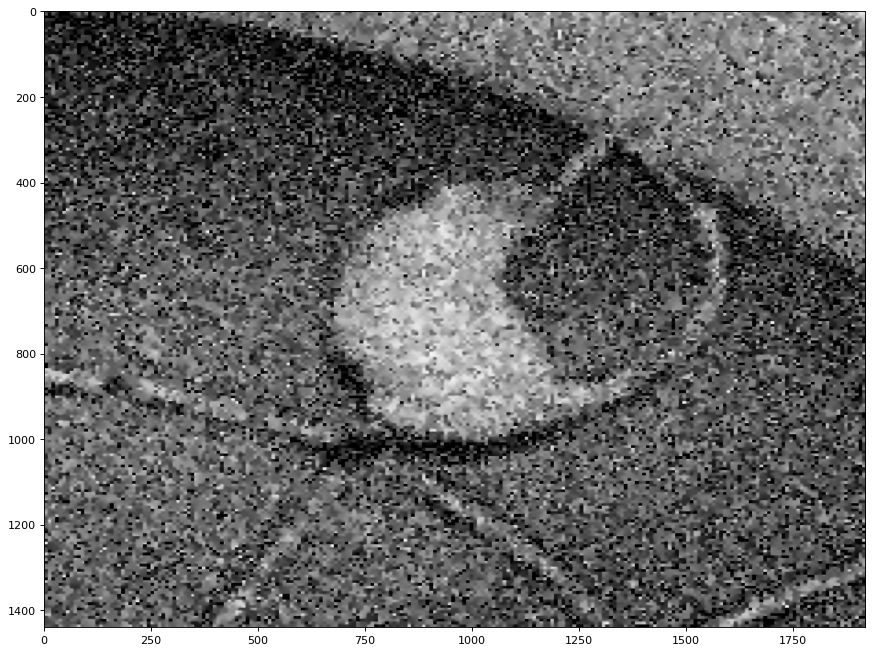

In [122]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(dst)

#### cv.fastNlMeansDenoisingColored()

<Figure size 1200x1200 with 0 Axes>

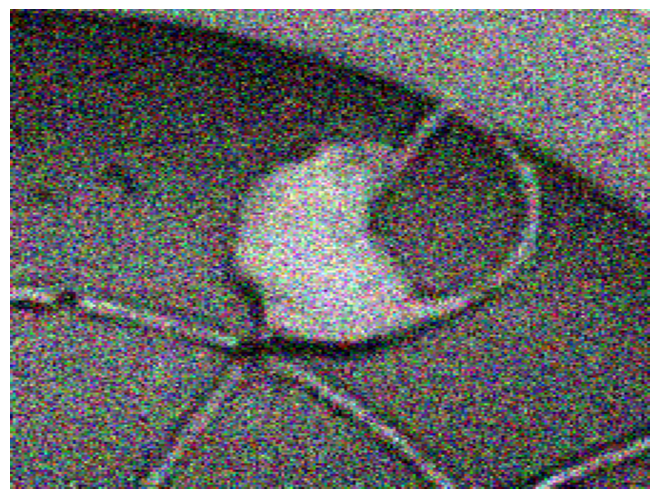

In [124]:
# добавляем шумы и сохраняем

img = cv2.imread("001.bmp")[...,::-1] / 255.0
noise = np.random.normal(loc=0, scale=1, size=img.shape)
noisy = np.clip((img + noise * 0.1), 0,1)
noisy2 = np.clip((img + noise * 0.2), 0,1)

plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(noisy2, aspect='auto')
plt.savefig("noised_mice.jpg", dpi=300)

In [127]:
img = cv2.imread('noised_mice.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 10, 7, 21)

<Figure size 1200x1200 with 0 Axes>

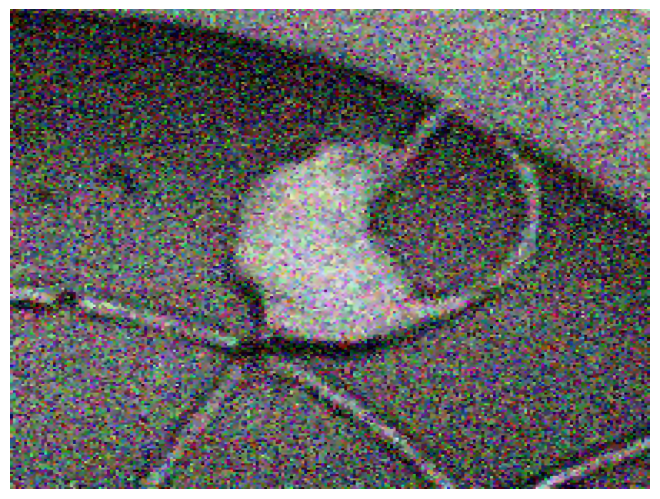

In [129]:
plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dst[...,::-1] / 255.0, aspect='auto')
plt.savefig("denoised_mice.jpg", dpi=300)

### Нейросеть под классификацию

In [5]:
a = pd.read_csv('10. MOTHS IMAGE DATASET-CLASSIFICATION\MOTHS.csv')

In [6]:
transforms = T.Compose([
    T.ToPILImage(),
    T.Resize(size = (112,112)),
    T.PILToTensor()
])

transforms_same = T.Compose([
    # T.Resize(size = (112,112)),
    T.PILToTensor()
])


transforms_gray = T.Compose([
    T.Grayscale(num_output_channels=1),
    T.PILToTensor()
])

### Собираем датасет
Берем картинку и через корень из суммы квадратов накладываем на все каналы фильтр Прюитт

In [7]:
ctr = 0
X_train = []
Y_train = []
X_test = []
Y_test = []

for i in a.values:
    im = Image.open('10. MOTHS IMAGE DATASET-CLASSIFICATION\\'+i[1])
    temp_gray = transforms_gray(im)
    pix = np.int_(np.array(temp_gray))
    input_shape = pix.shape
    new_shape = input_shape[1], input_shape[0]
    result = skimage.filters.prewitt(pix)
    ans = np.array(np.float64(transforms_same(im)))
    for j in range(3):
        ans[j]=np.sqrt(ans[j]*ans[j]+result[0]*result[0])
        # ans[j]=(ans[j]/2+result[0]/2)
    ans = np.int_(np.transpose(np.array(transforms(torch.tensor(ans)))))
    # X_train.append(ans)
    
    #ans = transforms(im)
    if i[3]=='train':
        X_train.append(ans)
        Y_train.append(i[0])
    elif i[3]=='test':
        X_test.append(ans)
        Y_test.append(i[0])
    ctr+=1
    if ctr%100==0:
        print(ctr)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600


Получается что-то такое. Не считая поплывших цветов разницы как быдто нет, но сетка её нашла и смогла доучиться до 88% accuracy(После еле-еле 60)

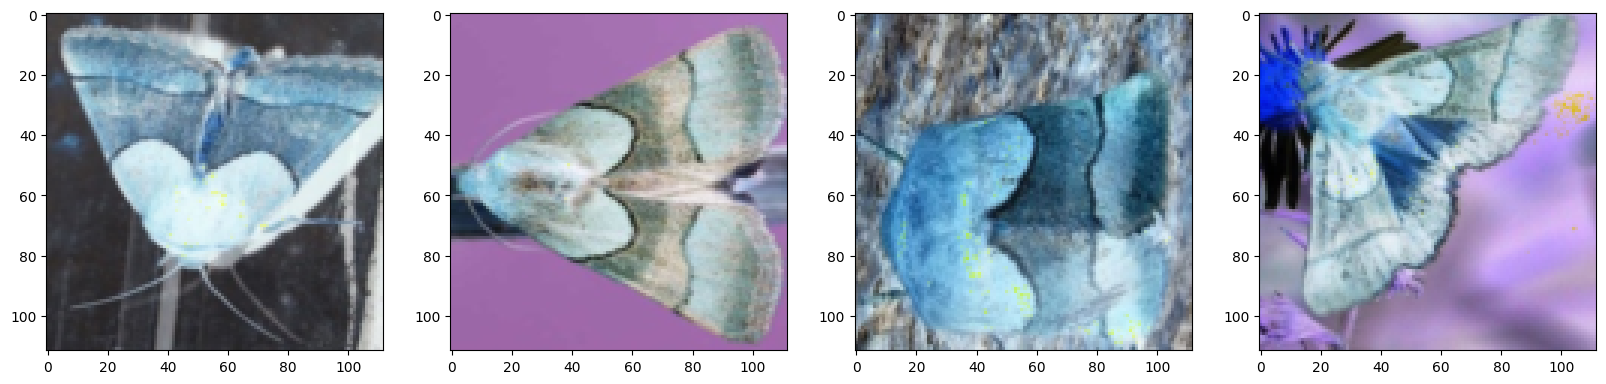

In [17]:
fig, axs = plt.subplots(1,4,figsize=(20,20))
for i in range(4):
    axs[i].imshow((np.int_(X_train[i])))

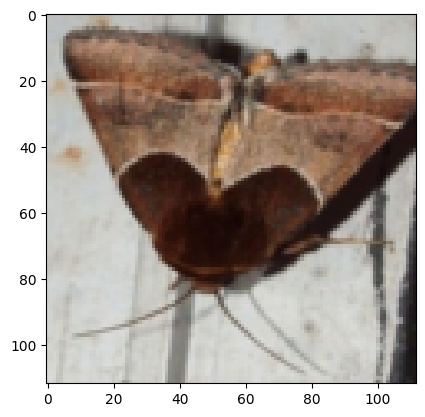

In [22]:
plt.imshow(pix)

In [24]:
Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

Xtest = np.array(X_test)
Ytest = np.array(Y_test)

Ytrain = keras.utils.to_categorical(Ytrain, 50) #10 классов 
Ytest = keras.utils.to_categorical(Ytest, 50)

In [25]:
Xtrain.shape[:]

(7183, 112, 112, 3)

In [26]:
input_shape = Xtrain.shape[1:]
input_shape

(112, 112, 3)

In [90]:
# архитектура игрушечной ResNet
inputs = keras.Input(shape=(112, 112, 3), name="img")

x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x =keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(50, activation='softmax')(x)
model = keras.Model(inputs, outputs, name="toy_resnet")

In [81]:
print("Num GPUs Available: ",
      len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


88% На игрушечной резнет

In [91]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Xtrain, Ytrain, batch_size=64, epochs=30)
print(model.evaluate(Xtest, Ytest))

Epoch 1/30
113/113 [==============================] - 8s 64ms/step - loss: 4.3363 - accuracy: 0.0308
Epoch 2/30
113/113 [==============================] - 7s 63ms/step - loss: 3.7207 - accuracy: 0.0558
Epoch 3/30
113/113 [==============================] - 7s 62ms/step - loss: 3.5238 - accuracy: 0.0841
Epoch 4/30
113/113 [==============================] - 7s 62ms/step - loss: 3.2189 - accuracy: 0.1342
Epoch 5/30
113/113 [==============================] - 7s 62ms/step - loss: 2.8938 - accuracy: 0.1945
Epoch 6/30
113/113 [==============================] - 7s 62ms/step - loss: 2.5917 - accuracy: 0.2621
Epoch 7/30
113/113 [==============================] - 7s 62ms/step - loss: 2.3547 - accuracy: 0.3120
Epoch 8/30
113/113 [==============================] - 7s 62ms/step - loss: 2.1946 - accuracy: 0.3622
Epoch 9/30
113/113 [==============================] - 7s 62ms/step - loss: 2.0209 - accuracy: 0.4037
Epoch 10/30
113/113 [==============================] - 7s 62ms/step - loss: 1.8622 - accura

In [27]:
#Identity block

def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [28]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [29]:
def ResNet50(input_shape= input_shape):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = keras.Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [30]:
base_model = ResNet50()

In [31]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(50,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [32]:
model = keras.Model(inputs=base_model.input, outputs=headModel)

In [33]:
from keras.optimizers import SGD, Adam

opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [83]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('/saved_models/best_model.h5', monitor='val_accuracy', 
                    save_best_only=True,
                    save_weights_only=False,
                    mode="auto",
                    save_freq="epoch",
                    initial_value_threshold=None,
)

Большая резнетка выше 73 не пробила

In [36]:
H = model.fit(Xtrain, Ytrain, 
              batch_size = 32, 
              epochs = 10, 
              validation_data =(Xtest, Ytest), 
              shuffle = True, 
            #   callbacks = [mc,es]
              ) 
# Score trained model. 
scores = model.evaluate(Xtest, Ytest, verbose = 1) 
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])


Epoch 1/10
225/225 [==============================] - 29s 128ms/step - loss: 0.2957 - accuracy: 0.9073 - val_loss: 1.2047 - val_accuracy: 0.7040
Epoch 2/10
225/225 [==============================] - 29s 128ms/step - loss: 0.2371 - accuracy: 0.9247 - val_loss: 1.1213 - val_accuracy: 0.7360
Epoch 3/10
225/225 [==============================] - 29s 128ms/step - loss: 0.2133 - accuracy: 0.9277 - val_loss: 1.4958 - val_accuracy: 0.6840
Epoch 4/10
225/225 [==============================] - 29s 128ms/step - loss: 0.2007 - accuracy: 0.9321 - val_loss: 1.4129 - val_accuracy: 0.7120
Epoch 5/10
225/225 [==============================] - 29s 129ms/step - loss: 0.1932 - accuracy: 0.9396 - val_loss: 1.9708 - val_accuracy: 0.6280
Epoch 6/10
225/225 [==============================] - 29s 129ms/step - loss: 0.2112 - accuracy: 0.9339 - val_loss: 1.9486 - val_accuracy: 0.6680
Epoch 7/10
225/225 [==============================] - 29s 128ms/step - loss: 0.2096 - accuracy: 0.9362 - val_loss: 1.4148 - val_ac

Дата/Время 20.06.23 23:22 Ради прикола после финального проекта подумал, а что если это загнать в yolo. Результат ожидаемо прекрасный.

In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("yolov8s-cls.pt")

100%|██████████| 12.2M/12.2M [00:01<00:00, 11.3MB/s]


In [3]:
results = model.train(data="10. MOTHS IMAGE DATASET-CLASSIFICATION", epochs=15, batch = 8, imgsz=224, amp = False)

New https://pypi.org/project/ultralytics/8.2.37 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.35  Python-3.10.11 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=10. MOTHS IMAGE DATASET-CLASSIFICATION, epochs=15, time=None, patience=100, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

train: Scanning D:\PatternRecogn\PatternRecognition\10. MOTHS IMAGE DATASET-CLASSIFICATION\train... 7183 images, 0 corrupt: 100%|██████████| 7183/7183 [00:05<00:00, 1212.73it/s]


train: New cache created: D:\PatternRecogn\PatternRecognition\10. MOTHS IMAGE DATASET-CLASSIFICATION\train.cache


val: Scanning D:\PatternRecogn\PatternRecognition\10. MOTHS IMAGE DATASET-CLASSIFICATION\test... 250 images, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 844.60it/s]


val: New cache created: D:\PatternRecogn\PatternRecognition\10. MOTHS IMAGE DATASET-CLASSIFICATION\test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs\classify\train
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 20.03it/s]

                   all      0.908       0.96



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.62it/s]

                   all      0.932      0.972



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.60it/s]

                   all      0.928      0.968



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 23.27it/s]

                   all      0.924       0.96



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.04it/s]

                   all      0.932      0.964



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.81it/s]

                   all       0.92      0.964



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.58it/s]

                   all      0.948      0.964



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.08it/s]

                   all      0.948      0.968



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.63it/s]

                   all      0.944       0.96



      Epoch    GPU_mem       loss  Instances       Size


      10/15     0.524G     0.1612          7        224: 100%|██████████| 898/898 [00:22<00:00, 39.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 23.56it/s]

                   all      0.944       0.96



      Epoch    GPU_mem       loss  Instances       Size


      11/15     0.524G     0.1429          7        224: 100%|██████████| 898/898 [00:22<00:00, 39.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.17it/s]

                   all      0.944      0.964



      Epoch    GPU_mem       loss  Instances       Size


      12/15     0.516G     0.1317          7        224: 100%|██████████| 898/898 [00:22<00:00, 39.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.17it/s]

                   all      0.956      0.972



      Epoch    GPU_mem       loss  Instances       Size


      13/15     0.522G     0.1178          7        224: 100%|██████████| 898/898 [00:22<00:00, 39.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.13it/s]

                   all      0.952      0.964



      Epoch    GPU_mem       loss  Instances       Size


      14/15     0.516G     0.1039          7        224: 100%|██████████| 898/898 [00:22<00:00, 39.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.09it/s]

                   all      0.952      0.968



      Epoch    GPU_mem       loss  Instances       Size


      15/15     0.516G     0.1016          7        224: 100%|██████████| 898/898 [00:22<00:00, 39.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 24.17it/s]

                   all      0.944       0.96



15 epochs completed in 0.108 hours.
Optimizer stripped from runs\classify\train\weights\last.pt, 10.4MB
Optimizer stripped from runs\classify\train\weights\best.pt, 10.4MB

Validating runs\classify\train\weights\best.pt...
Ultralytics YOLOv8.2.35  Python-3.10.11 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv8s-cls summary (fused): 73 layers, 5139250 parameters, 0 gradients, 12.5 GFLOPs
WARNING  Dataset 'split=val' not found, using 'split=test' instead.
train: D:\PatternRecogn\PatternRecognition\10. MOTHS IMAGE DATASET-CLASSIFICATION\train... found 7183 images in 50 classes  
val: None...
test: D:\PatternRecogn\PatternRecognition\10. MOTHS IMAGE DATASET-CLASSIFICATION\test... found 250 images in 50 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 23.15it/s]


                   all      0.956      0.964
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train
Results saved to runs\classify\train
